<a href="https://colab.research.google.com/github/unica-ml/ml/blob/master/notebooks/lab-clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

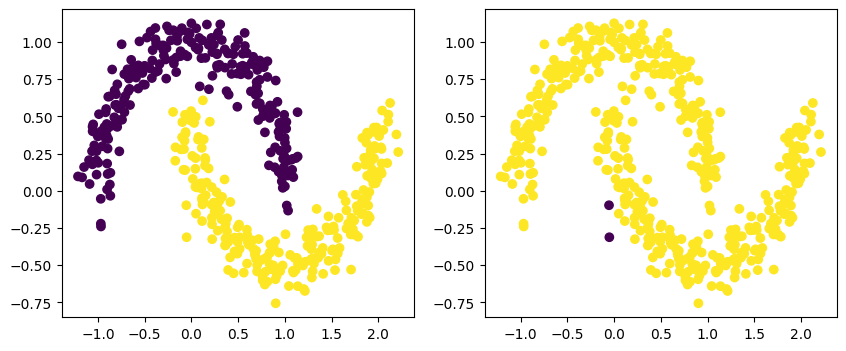

In [130]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_moons
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.cluster import AgglomerativeClustering
np.set_printoptions(precision=2)

# load make moons
x, y = make_moons(n_samples=500, noise=0.1, random_state=5)

method = 'single'
clustering = AgglomerativeClustering(n_clusters=2, metric='cosine', linkage=method).fit(x)

# run kmeans clustering
from sklearn.cluster import KMeans
# clustering = KMeans(n_clusters=10, random_state=5).fit(x)

labels = clustering.labels_

# run GMM clustering
from sklearn.mixture import GaussianMixture
# clustering = GaussianMixture(n_components=10, random_state=5).fit(x)
# labels = clustering.predict(x)


plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1], c=labels)
plt.show()


# compute pairwise distances
# from sklearn.metrics.pairwise import pairwise_distances
# D = pairwise_distances(x)
# print(D)


Text(0, 0.5, 'distance')

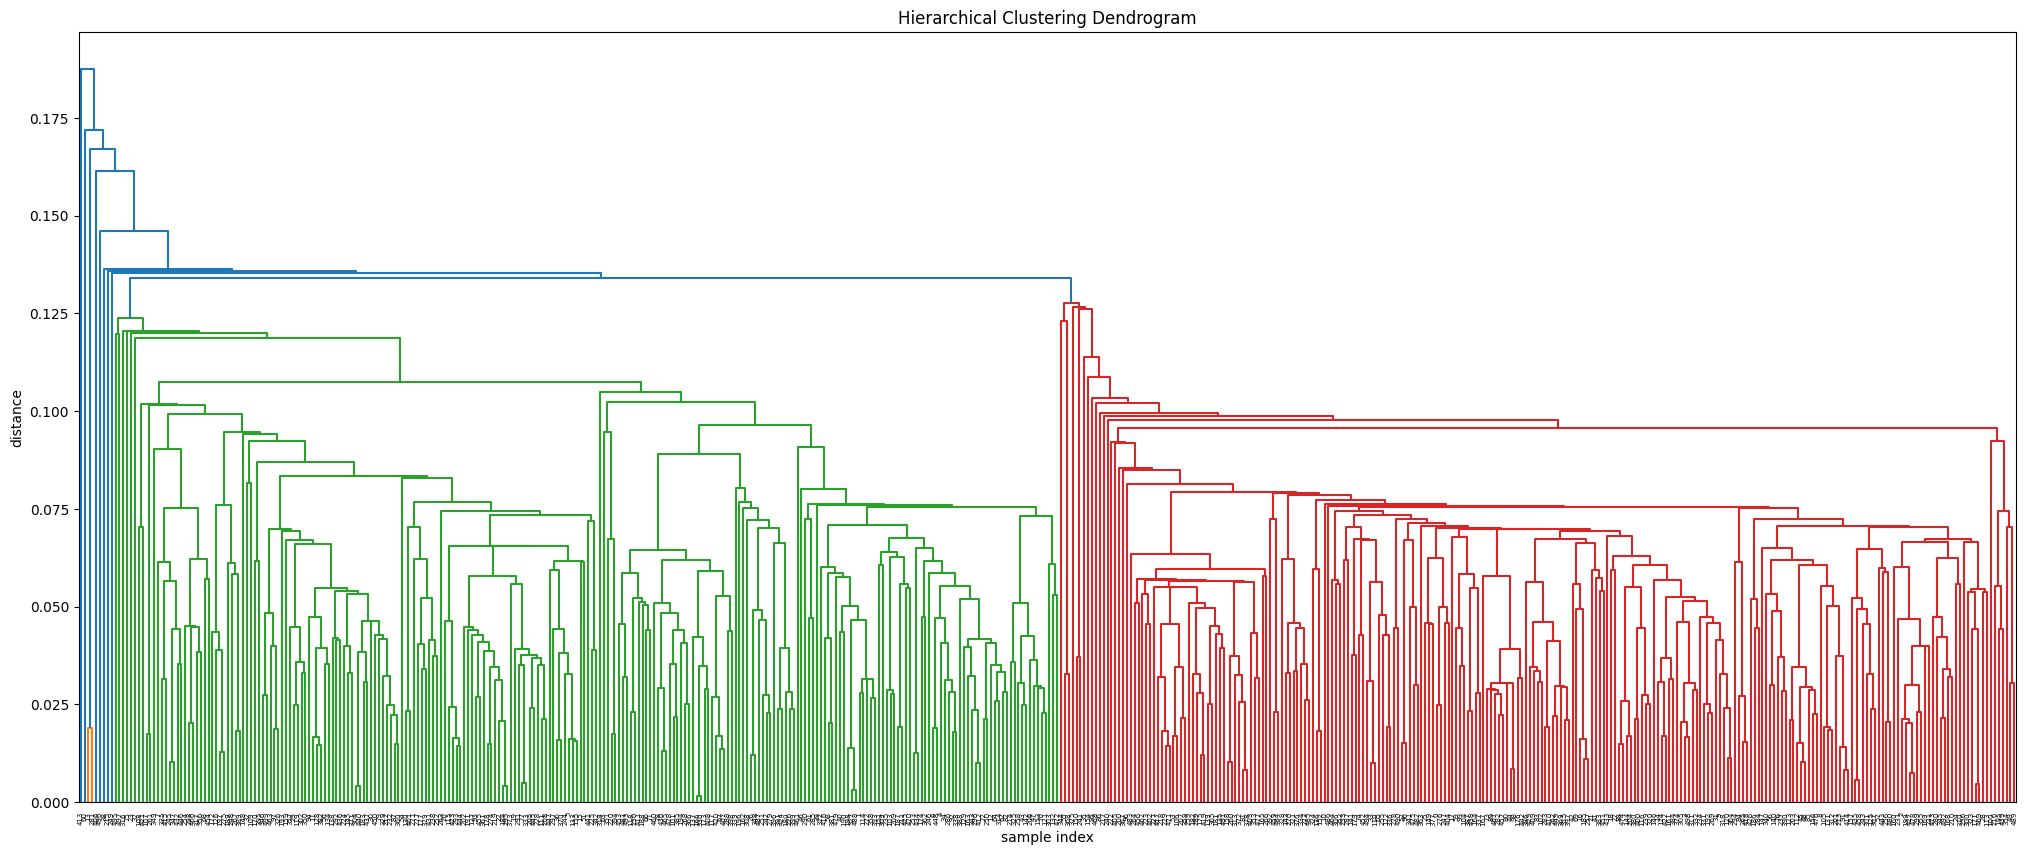

In [131]:
# cluster data with single-linkage hierarchical clustering
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(x, method=method)
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')



(70000, 784) (70000,)
(1000, 784) (1000,)
[0 1 2 3 4 5 6 7 8 9] [ 97 116  99  93 105  92  94 117  87 100]


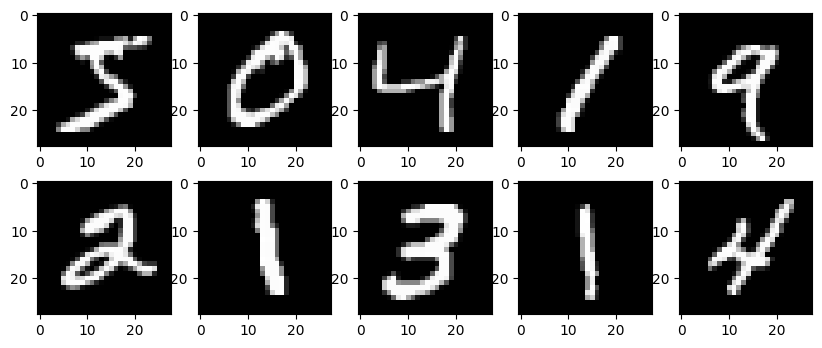

(1000, 3)


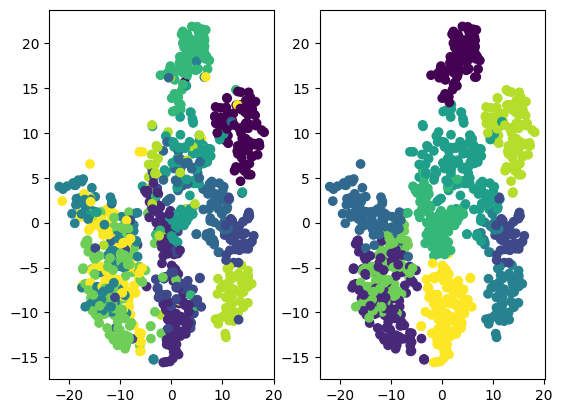

In [132]:
#load mnist
x, y = fetch_openml('mnist_784', as_frame=False, return_X_y=True)
print(x.shape, y.shape)
n_samples = 1000
x = x[:n_samples]
y = y[:n_samples]

#cast labels to integers
y = y.astype(int)

print(x.shape, y.shape)

#count how many samples in each class
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

#plot a bunch of digits
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x[i].reshape(28,28), cmap='gray')
plt.show()

# do tSNE to reduce dimensionality
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3, random_state=5)
x = tsne.fit_transform(x)
print(x.shape)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=50)
# x = pca.fit_transform(x)
# print(x.shape)

# do kmeans clustering
# clustering = KMeans(n_clusters=10, random_state=5).fit(x)
# clustering = AgglomerativeClustering(n_clusters=10, linkage='ward').fit(x)
# labels = clustering.labels_

clustering = GaussianMixture(n_components=10, random_state=5).fit(x)
labels = clustering.predict(x)


# scatter the first two components
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1], c=y)
plt.subplot(1,2,2)
plt.scatter(x[:,0], x[:,1], c=labels)

plt.show()




In [135]:
# compute one-hot encoding of the labels and of the clustering labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
y_onehot = enc.fit_transform(y.reshape(-1,1)).toarray()
print(y_onehot.sum(axis=1).sum())
labels_onehot = enc.fit_transform(labels.reshape(-1,1)).toarray()
print(labels_onehot.shape)

# evaluate distance between clusterings
# what fraction of pairs of points are clustered differently?
# dist = ||YY'-LL'||_F (Frobenius norm), with Y and L one-hot label encodings
A = np.dot(y_onehot,y_onehot.T)-np.dot(labels_onehot,labels_onehot.T)
print(abs(A).mean())

1000.0
(1000, 10)
0.096976


In [136]:
# compare the clustering labels with the true labels
# rand score measures similarity in [-1,1], where 0 means random clustering
from sklearn.metrics.cluster import adjusted_rand_score
print(adjusted_rand_score(y, labels))


0.47673096246719165
